AI in healthcare: A Critical analysis into deep learning and machine learning methods in the diagnosis of heart disease.


Importing packages to use in the code using the import function

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Creating a dataframe and importing a CSV(comma seperated value) file (heart disease dataset)into the program. 

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dfx = df[df['thal'] == 2]
dfx

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [4]:
#import pandas_profiling as pp
#pp.ProfileReport(df)

Rows being dropped using the .drop function as these in the original data set are null values. In this dataset they have been changed to be outside of the range of the original set of values for "ca" and "thal". Thus they need to be removed to keep the dataset accurate. 

In [5]:
df.drop ([93 , 139 , 164 , 165 , 252 , 49 , 282], axis =0,)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Feature -- description   -- Range of Values    -- Value description

age --	Age of the patient  --  29 - 77     --      Years old 

sex --	The biological Sex of a patient --  0-1 -- 1 = male , 0 = female

cp  -- Chest pain felt by the patient -- 0-3 -- 0=asymptomatic , 1=atypical angina , 2=non-anginal pain , 3=typical angina pain 

trestbps -- resting blood pressure -- 94 - 200 -- in mm hg on admission to hospital (higher the worse)

chol - serum cholestrol in mg/dl -- 126-564 mg/dl -- NHS advise that you should have around 90 mg/dl 

fbs -- fasting blood sugar -- 0 - 1 -- fasting blood sugar > 120mg/dl (1=true, 0=false)

restecg -- resting electrocardiographic results -- 0 - 2 -- Zero = Showing probable or definite left ventricular hypertrophy by Estes criteria ,  One = Normal , Two = Having ST-T wave abnormality (T wave inversions / ST elevation or depression of > 0.05mV)

thalach -- maximum heart rate achieved -- 71 - 202 -- The maximum heart rate achieved while being observed and connected to an ECG.

exang -- Exercised induced angina -- 0-1 -- 1 = yes angina is induced by exercise , 0 = no angina 

oldpeak  -- st depression induced by excerise relative to rest -- 0 - 2 -- Change of the ECG, usually measured in mm. 

slope  -- The slope of the peak exercise relative to rest -- 0 - 2 -- 0 = Upsloping , 1= flat , 2 = down-sloping. 

ca -- Number of major vessels coloured by fluoroscopy -- 0 - 3 -- Number of major vessels coloured by fluoroscopy. 

thal -- Results of the blood flow observed via the radioactive dye -- 1 - 3 -- 1	= Fixed defect – no blood supply to certain areas of the heart , 2	 = normal blood flow , 3	 = reversible defect – a blood flow is visible but not normal. 

target -- The diagnosis of the patient  -- 0 - 1 -- 0 = < 50% diameter narrowing – HD not present , 1 = > 50% diameter narrowing  - HD is present. 


Data Analysis 

Univariate feature selection is a great tool to understand your dataset and what features are important to the overall prediction of the model. The statistcal test Chi2 was used in this case because it works well with  categorical data types which have been used here. 

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e classification
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


The extra tree classifier implements randomized decision trees on a subset of the data set to minimise the learning from the data. It then considers the average of each of the trees to improve the accuracy and control over fitting. It is a tool best used to understand the feature importance in comparison to the classification. The higher the number the higher the importance.

[0.06984001 0.05684372 0.12275568 0.06214642 0.06142314 0.02125548
 0.03473814 0.08345193 0.10070356 0.09029751 0.06759948 0.12338902
 0.1055559 ]


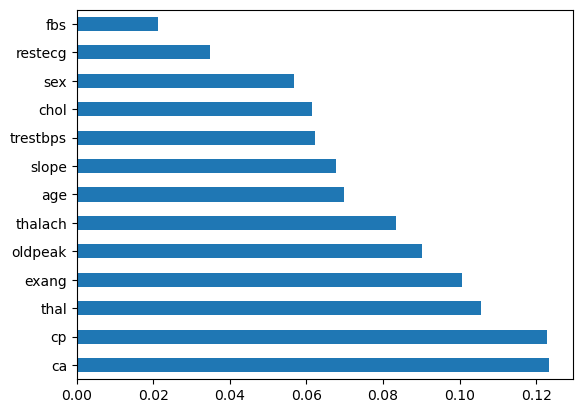

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

Overall the most important features are ca , cp , thal and exang are the most important features based upon the extra trees feature importance. 

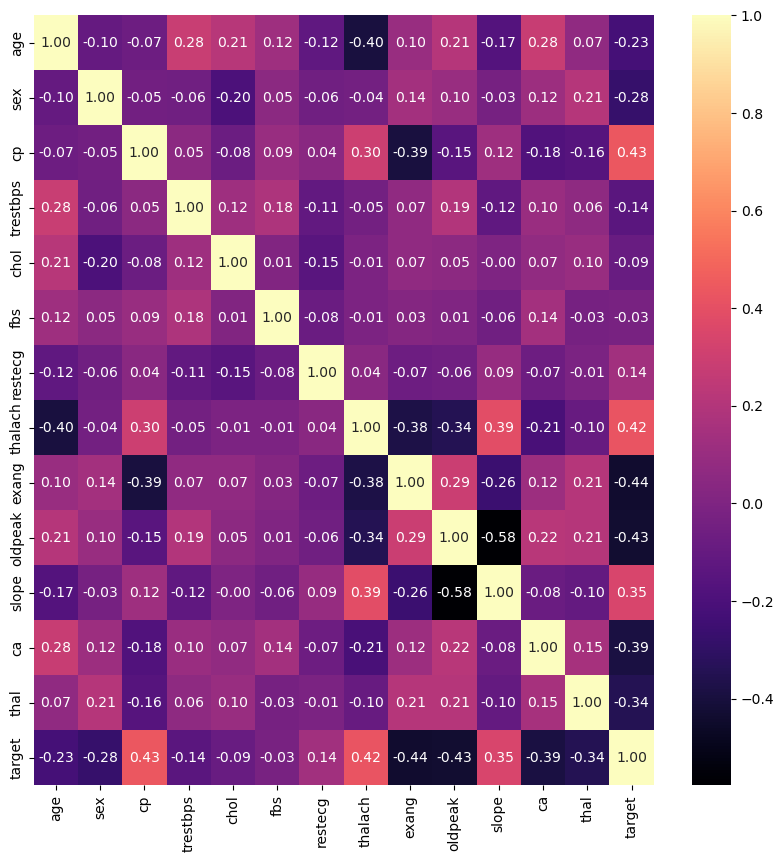

In [8]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')
plt.savefig('heatmap.jpg')


A heat map has been applied to the dataset to understand the features importance to eachother and the target. As shown before in the extra tree classifier ca , cp , thal and exang are all important with cp being the most important feature of them all. thalach is also deemed as positively correlated to the target along side with slope. 

In [9]:
dfx = df.copy()

Data visualisation 

Creating Count plots to see the spread of patients with HD over different features that have been highlighted as important features. 

In [10]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
dfx['target'] = dfx['target'].apply(chng2)

Changing the numbers in the target column to represent the actual classification of the patient. 

Chest pain type vs target shows us that most of the patients didnt have any chest pain but still had 

Text(0.5, 1.0, 'Chest Pain Type  v/s Classification\n')

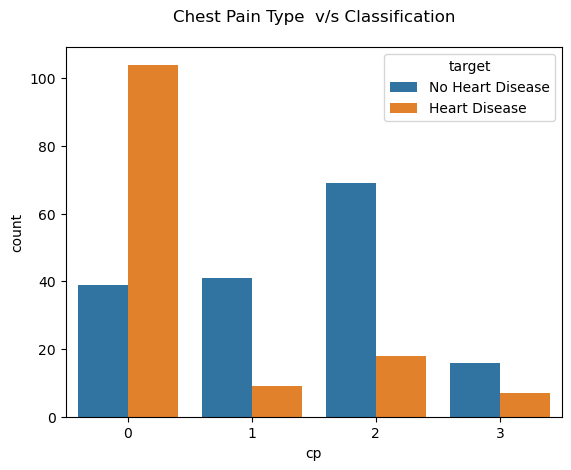

In [11]:
sns.countplot(data= dfx, x='cp',hue='target')
plt.savefig('cpVStarget.jpg')
plt.title('Chest Pain Type  v/s Classification\n')

Text(0.5, 1.0, 'Major blood vessels v/s target\n')

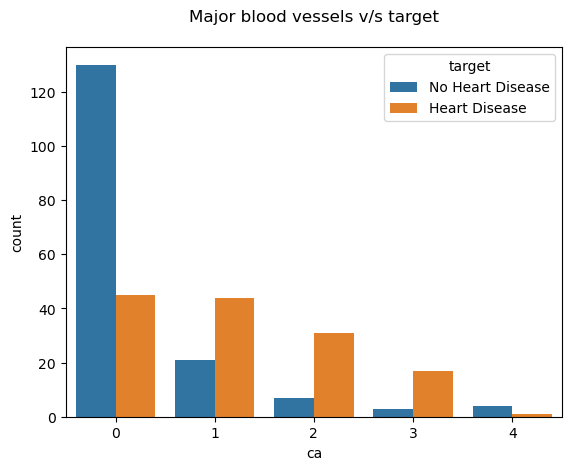

In [12]:
sns.countplot(data= dfx, x='ca',hue='target')
plt.savefig('caVStarget.jpg')
plt.title('Major blood vessels v/s target\n')

Text(0.5, 1.0, 'Thalassemia v/s target\n')

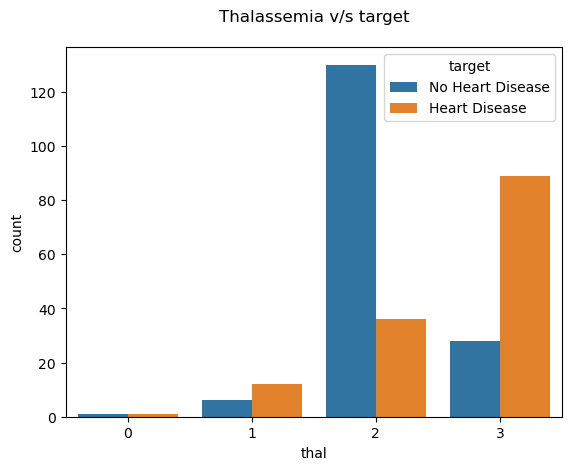

In [13]:
sns.countplot(data= dfx, x='thal',hue='target')
plt.savefig('thalVStarget.jpg')
plt.title('Thalassemia v/s target\n')

Text(0.5, 1.0, 'exercised induced angina v/s target\n')

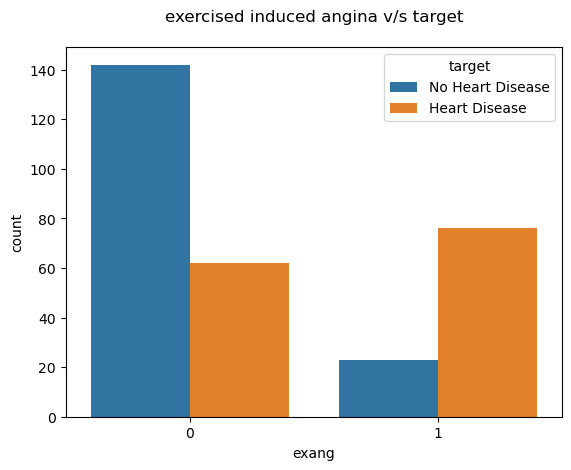

In [14]:
sns.countplot(data= dfx, x='exang',hue='target')
plt.savefig('exangVStarget.jpg')
plt.title('exercised induced angina v/s target\n')

Text(0.5, 1.0, 'The slope of the peak exercise relative to rest v/s target\n')

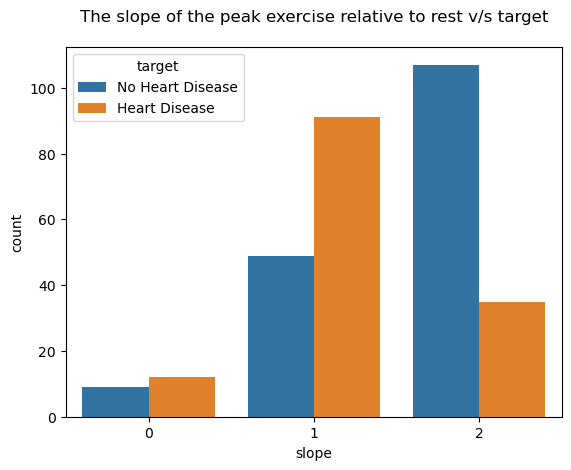

In [15]:
sns.countplot(data= dfx, x='slope',hue='target')
plt.savefig('slopeVStarget.jpg')
plt.title('The slope of the peak exercise relative to rest v/s target\n')

c:\Users\xxtom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Maximum heart rate achieved in heart disease patients \n')

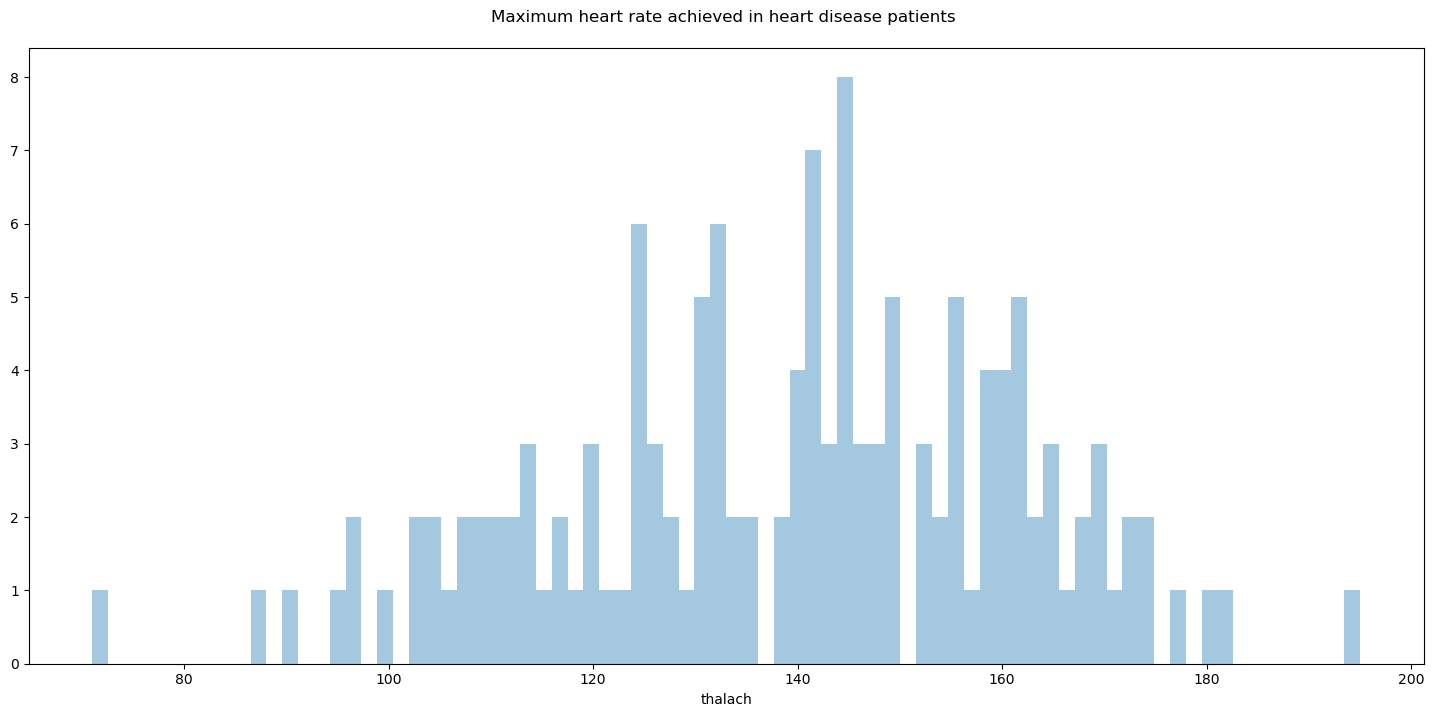

In [16]:
plt.figure(figsize=(18,8))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=80 )
plt.savefig('thalachvscount.jpg')
plt.title('Maximum heart rate achieved in heart disease patients \n')

<Figure size 640x480 with 0 Axes>

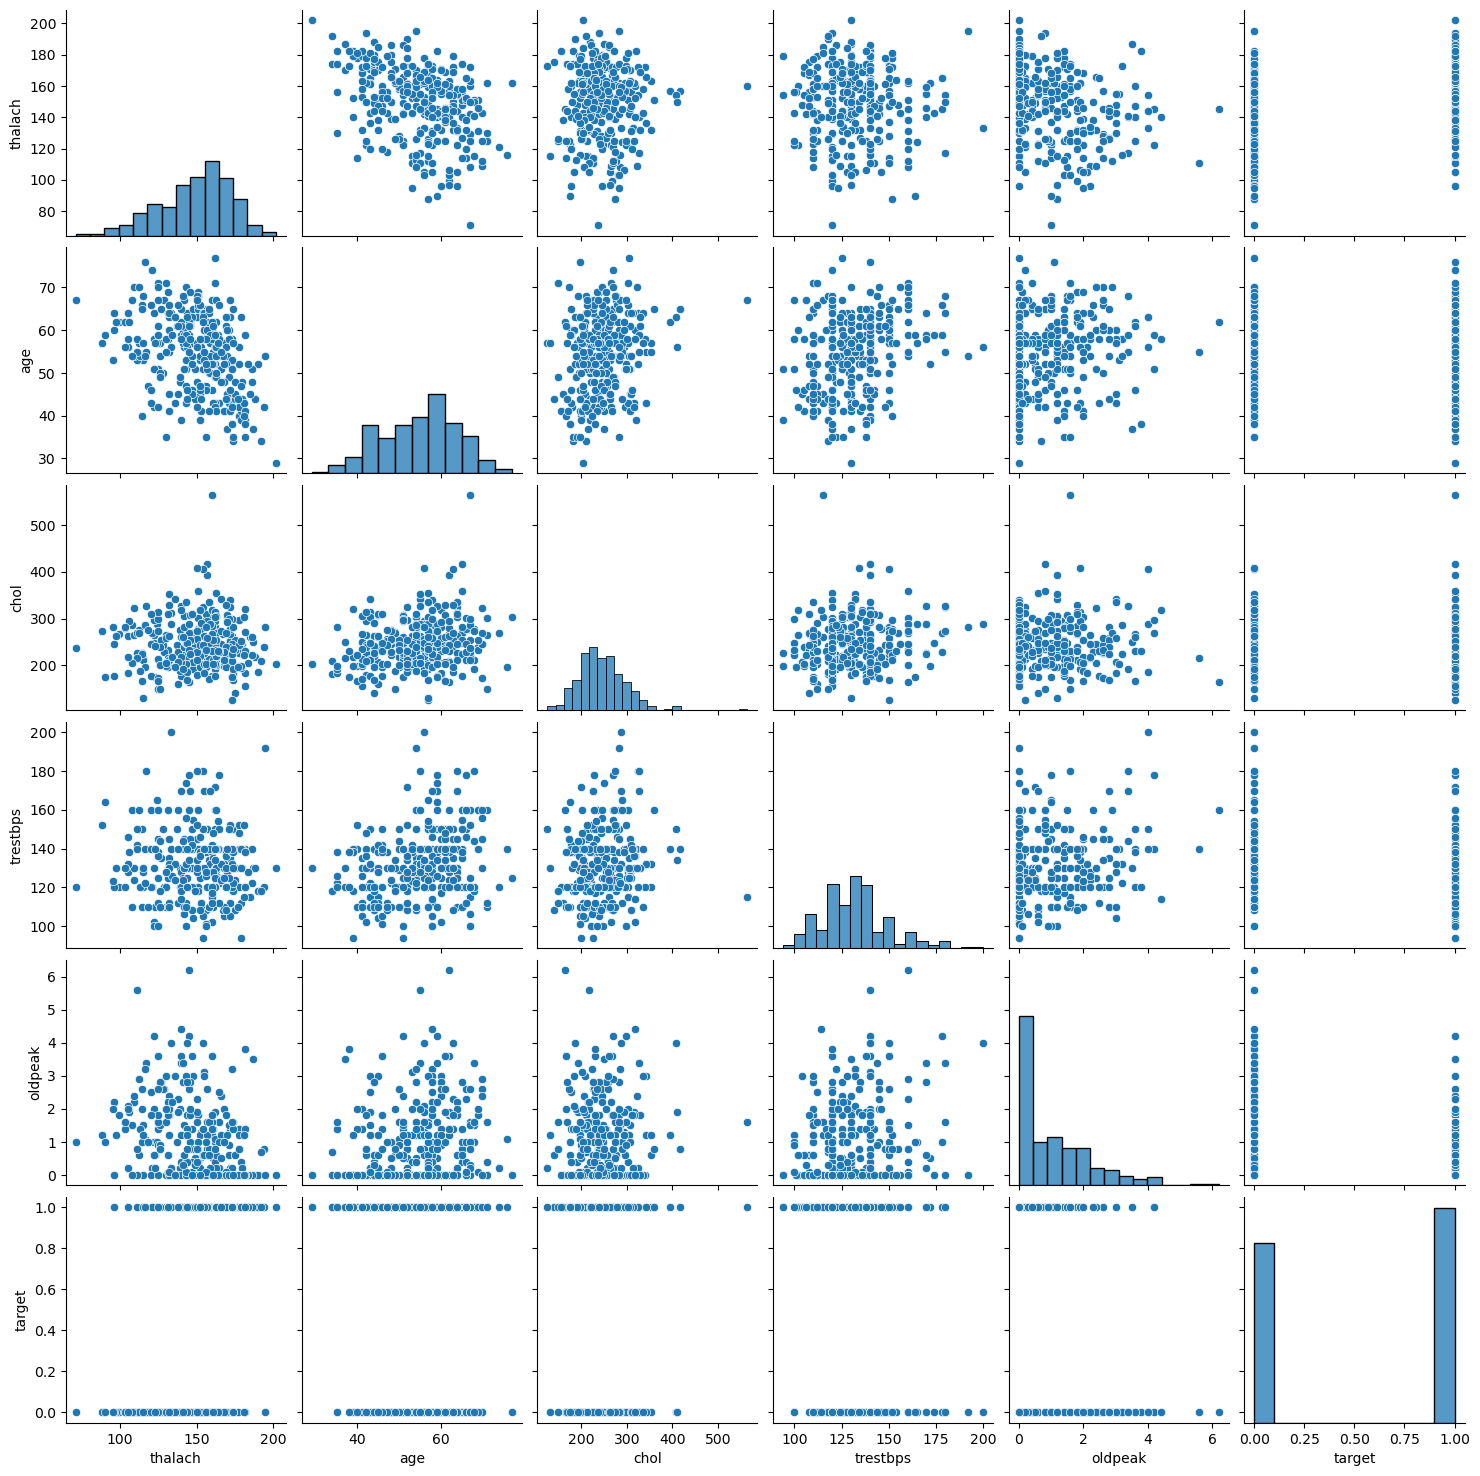

In [17]:
cols = ['thalach' , 'age' , 'chol' , 'trestbps' , 'oldpeak' , 'target']
plt.savefig('pairplot.jpg')
sns.pairplot(df[cols])

Creating a pairplot on the data that has a large value range to understand the dispersion better.   

Creating a classifaction tree to better understand the data.

In [18]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn.metrics import matthews_corrcoef
#Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252747252747253


Creating a baseline for our model

In [21]:
feature_cols = ['Age', 'Sex', 'CP', 'Trestbps','Chol', 'FBS', 'Rest ECG', 'Thalach','exanag', 'oldpeak', 'slope', 'ca', 'thal']

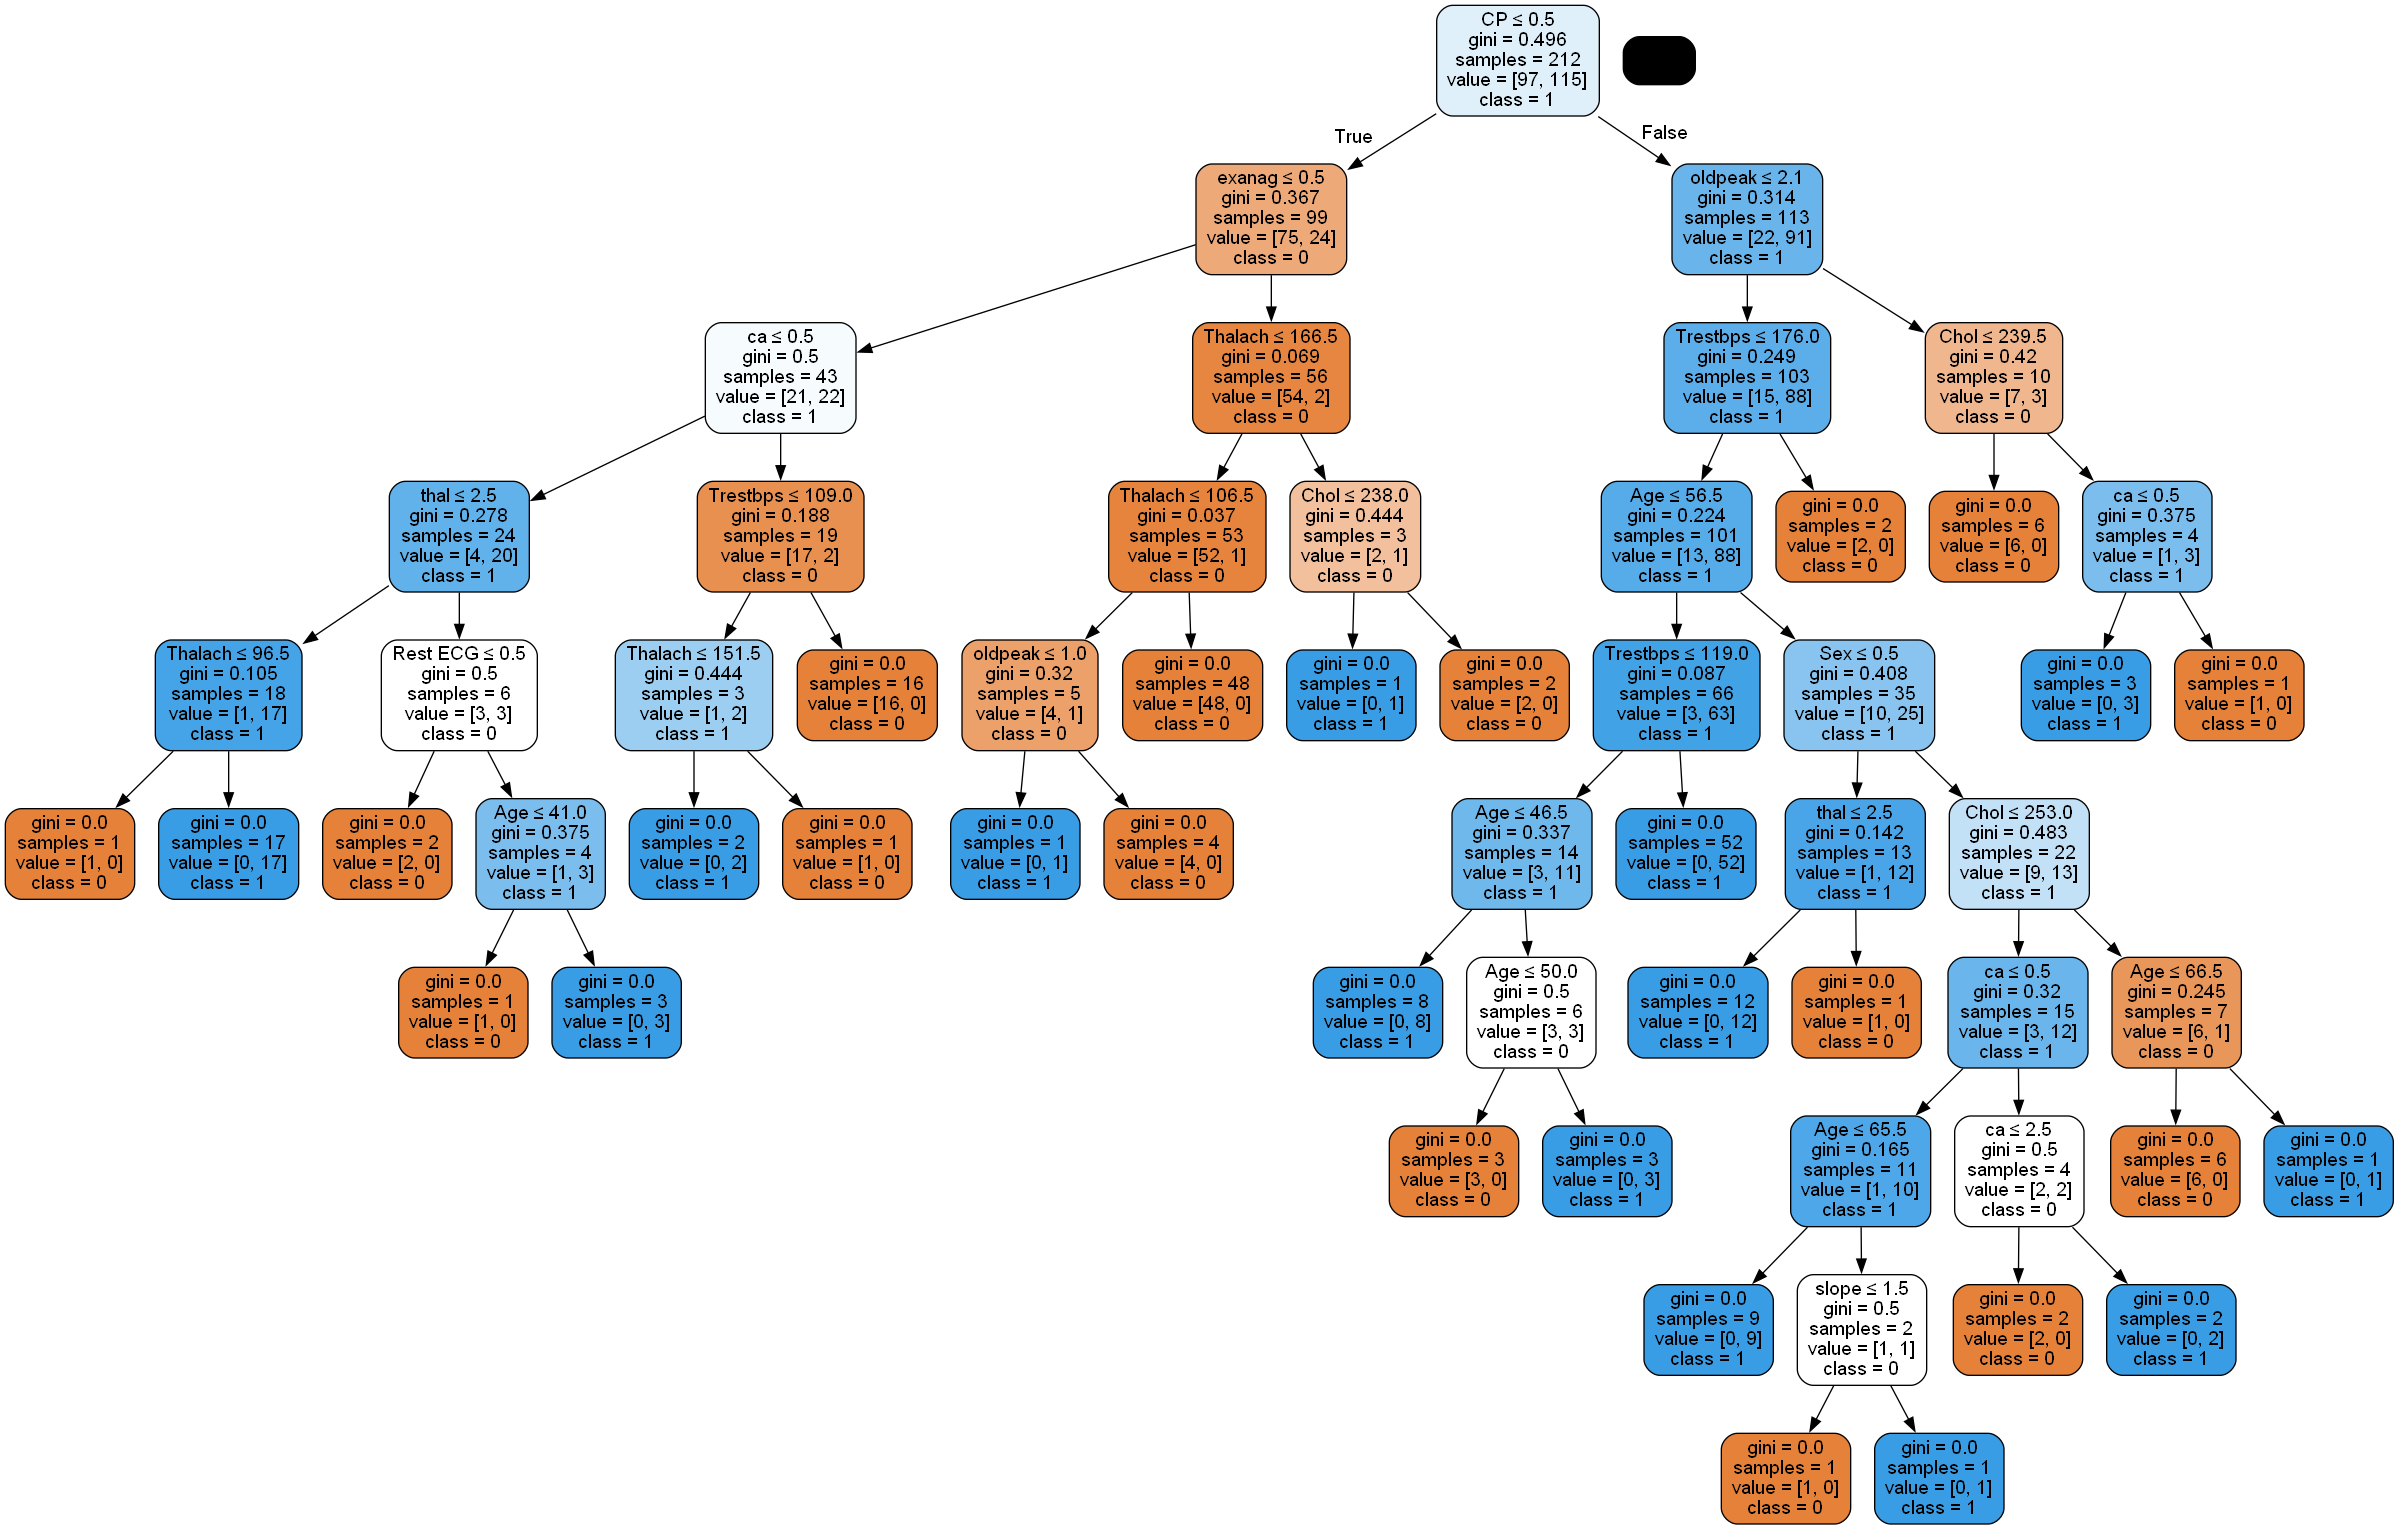

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Heart_Disease_Tree.png')
Image(graph.create_png())

Classifaction tree

Starting the data pre-processing

Starting by changing the column names. This has been done to better understand the data that is in them. 

In [23]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

The dataset has also been split up using the categorical columns for example Chest pain, rest ECG, ST slope (a dip below the baseline in a ECG) and thal (thalassemia type). The numbers that are represented in these columns is associated with different words that represent the numbers. For example, chest pain type (CP) 0 = asymptomatic. This step increases the total features from 13 to 18 features. 

In [24]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

In [25]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,1,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1


Adding on hot encoding, makes sure that there is only numerical values in columns for better results from the algorithms. 

In [26]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

Removing null values

In [27]:
df_temp = data['thalassemia_type_fixed defect']

In [28]:
data = pd.get_dummies(df, drop_first=True)

In [29]:
data.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,1,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,1,0,0


In [30]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,1,0,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,1,0,1,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,0,1,0,1,1,0,0,0


In [31]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

Removed thalassemia_type_nothing and replaced with useful column that one hot encoding dropped thalassemia_type_fixed. 

In [32]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

Machine learning algorithms 

Splitting the data into x and y dataframes.

In [33]:
X = result.drop('target', axis = 1)
          

In [34]:
y = result['target']

Splitting the data into a training data set and a testing data set. 

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Normalising the data.

In [36]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

c:\Users\xxtom\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\xxtom\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\xxtom\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\xxtom\anaconda3\lib\site-packages\numpy\core\fromnum

Creating a logistic regression machine learning algorithm using Sklearn in built functions.

Best Penalty: l2
Best C: 0.004291934260128779
Best Number Of Components: 12

LogisticRegression(C=0.004291934260128779, max_iter=100000)
accuracy 0.8852459016393442
TP rate 0.8823529411764706
FP rate 0.1111111111111111
[[24  3]
 [ 4 30]]
recall: 0.8823529411764706
precision: 0.9090909090909091
accuracy: 0.8852459016393442
F1 0.8955223880597014
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

AUC: 0.8856209150326797
MCC 0.7687337199108693


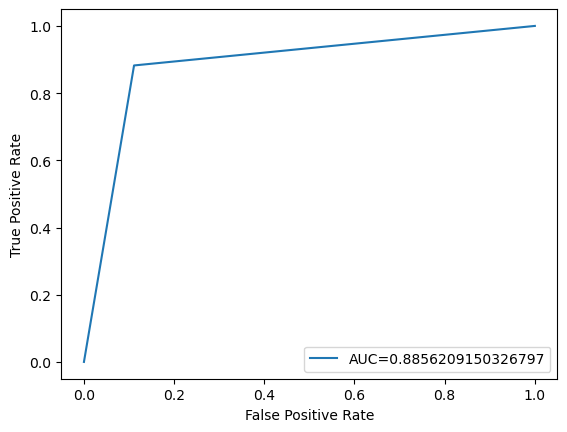

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
pca = decomposition.PCA()
LogReg = LogisticRegression(max_iter=100000)

pipe = Pipeline(steps=[('std_slc' , std_slc),
                       ('pca' , pca),
                       ('LogReg', LogReg)])

n_components = list(range(10 , X.shape[1]+1,1))
C = np.logspace(-4,4,50)
penalty = ['l2']
parameters = {'pca__n_components': n_components,
              'LogReg__C': C, 
              'LogReg__penalty': penalty}

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train,y_train)
y_predlog = clf_GS.predict(X_test)

print('Best Penalty:', clf_GS.best_estimator_.get_params()['LogReg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['LogReg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); 
print(clf_GS.best_estimator_.get_params()['LogReg'])
print("accuracy", metrics.accuracy_score(y_test,y_predlog))
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_predlog)
TN1 = c_matrix[0][0]
FN1 = c_matrix[1][0]
TP1 = c_matrix[1][1]
FP1 = c_matrix[0][1]

TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)

print ("TP rate",TP_rate)
print ("FP rate",FP_rate)

print(c_matrix)
print("recall:",metrics.recall_score(y_test, y_predlog))
print("precision:",metrics.precision_score(y_test,y_predlog))
print("accuracy:",metrics.accuracy_score(y_test, y_predlog))
print("F1",metrics.f1_score(y_test,y_predlog))
print(metrics.classification_report(y_test,y_predlog))
print("AUC:",metrics.roc_auc_score(y_test, y_predlog))
print("MCC" ,matthews_corrcoef(y_test, y_predlog))

fpr, tpr, _ = metrics.roc_curve(y_test, y_predlog)
auc = metrics.roc_auc_score(y_test, y_predlog)
#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('AUC_LOG.png')
plt.show()


In [38]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [39]:
result  = pd.DataFrame(dic)

Creating a scatter graph between 0 -1 and seeing if the prediction was correct based upon the classification. 

In [40]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))
                
#fig.write_image("images/pred.png")

Creating a MLP to test our data on.

0.9008264462809917
Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (8,), 'solver': 'adam'}
TP rate 0.9117647058823529
FP rate 0.18518518518518517
[[22  5]
 [ 3 31]]
recall: 0.9117647058823529
precision: 0.8611111111111112
accuracy: 0.8688524590163934
F1 0.8857142857142858
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

AUC: 0.8632897603485838
MCC 0.7338093457393797


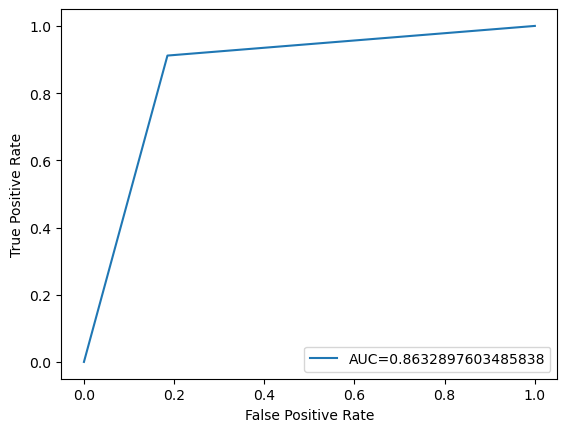

In [41]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
MLP = MLPClassifier(max_iter=100000)

parameter_space = {
    'hidden_layer_sizes': [(12,),(20,),(30,),(12,12,),(8,),(50,)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05 , 0.001],
}
from sklearn.model_selection import GridSearchCV
MLP = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
MLP.fit(X_train, y_train) # X is train samples and y is the corresponding labels
print(MLP.score(X_train, y_train))
y_predMLP = MLP.predict(X_test)
print('Best parameters found:\n', MLP.best_params_)
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_predMLP)
TN1 = c_matrix[0][0]
FN1 = c_matrix[1][0]
TP1 = c_matrix[1][1]
FP1 = c_matrix[0][1]

TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)
print ("TP rate",TP_rate)
print ("FP rate",FP_rate)

print(c_matrix)
print("recall:",metrics.recall_score(y_test, y_predMLP))
print("precision:",metrics.precision_score(y_test,y_predMLP))
print("accuracy:",metrics.accuracy_score(y_test, y_predMLP))
print("F1",metrics.f1_score(y_test,y_predMLP))
print(metrics.classification_report(y_test,y_predMLP))
print("AUC:",metrics.roc_auc_score(y_test, y_predMLP))
print("MCC" ,matthews_corrcoef(y_test, y_predMLP))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predMLP)
auc = metrics.roc_auc_score(y_test, y_predMLP)
#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('AUC_MLP.png')
plt.show()


Creating a XGBoost algorithm. 

accuracy 0.7377049180327869
TP rate 0.6176470588235294
FP rate 0.1111111111111111
[[24  3]
 [13 21]]
recall: 0.6176470588235294
precision: 0.875
accuracy: 0.7377049180327869
F1 0.7241379310344829
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        27
           1       0.88      0.62      0.72        34

    accuracy                           0.74        61
   macro avg       0.76      0.75      0.74        61
weighted avg       0.77      0.74      0.74        61

AUC: 0.7532679738562091
MCC 0.5150212272436646


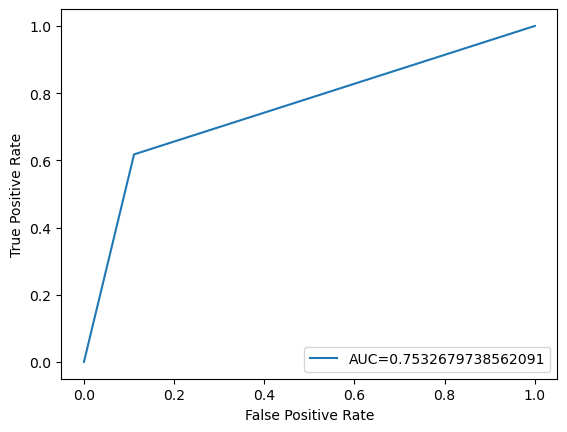

In [42]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(eta = 0.3 , booster = 'gbtree' )
xgb_classifier.fit(X_train,y_train)
y_predxgb = xgb_classifier.predict(X_test)
print("accuracy", metrics.accuracy_score(y_test,y_predxgb))

from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_predxgb)
TN1 = c_matrix[0][0]
FN1 = c_matrix[1][0]
TP1 = c_matrix[1][1]
FP1 = c_matrix[0][1]

TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)
print ("TP rate",TP_rate)
print ("FP rate",FP_rate)

print(c_matrix)
print("recall:",metrics.recall_score(y_test, y_predxgb))
print("precision:",metrics.precision_score(y_test,y_predxgb))
print("accuracy:",metrics.accuracy_score(y_test, y_predxgb))
print("F1",metrics.f1_score(y_test,y_predxgb))
print(metrics.classification_report(y_test,y_predxgb))
print("AUC:",metrics.roc_auc_score(y_test, y_predxgb))
print("MCC" ,matthews_corrcoef(y_test, y_predxgb))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predxgb)
auc = metrics.roc_auc_score(y_test, y_predxgb)
#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('AUC_XGB.png')
plt.show()

Creating a K-nearest neighbours algorithm.

c:\Users\xxtom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



accuracy 0.8360655737704918
TP rate 0.7941176470588235
FP rate 0.1111111111111111
[[24  3]
 [ 7 27]]
recall: 0.7941176470588235
precision: 0.9
accuracy: 0.8360655737704918
F1 0.84375
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.90      0.79      0.84        34

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

AUC: 0.841503267973856
MCC 0.6785857352185997


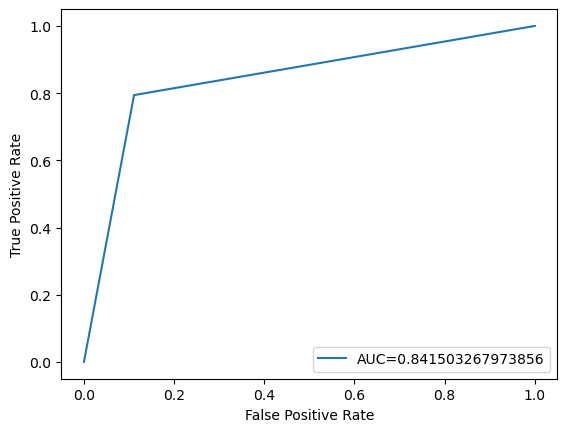

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predknn = knn.predict(X_test)
print("accuracy", metrics.accuracy_score(y_test,y_predknn))

from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_predknn)
TN1 = c_matrix[0][0]
FN1 = c_matrix[1][0]
TP1 = c_matrix[1][1]
FP1 = c_matrix[0][1]

TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)
print ("TP rate",TP_rate)
print ("FP rate",FP_rate)

print(c_matrix)
print("recall:",metrics.recall_score(y_test, y_predknn))
print("precision:",metrics.precision_score(y_test,y_predknn))
print("accuracy:",metrics.accuracy_score(y_test, y_predknn))
print("F1",metrics.f1_score(y_test,y_predknn))
print(metrics.classification_report(y_test,y_predknn))
print("AUC:",metrics.roc_auc_score(y_test, y_predknn))
print("MCC" ,matthews_corrcoef(y_test, y_predknn))
fpr, tpr, _ = metrics.roc_curve(y_test, y_predknn)
auc = metrics.roc_auc_score(y_test, y_predknn)
#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('AUC_KNN.png')
plt.show()

Creating a Decision tree algorithm.

accuracy 0.7049180327868853
TP rate 0.6176470588235294
FP rate 0.18518518518518517
[[22  5]
 [13 21]]
recall: 0.6176470588235294
precision: 0.8076923076923077
accuracy: 0.7049180327868853
F1 0.7
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        27
           1       0.81      0.62      0.70        34

    accuracy                           0.70        61
   macro avg       0.72      0.72      0.70        61
weighted avg       0.73      0.70      0.70        61

AUC: 0.7162309368191722
MCC 0.4343586453440058


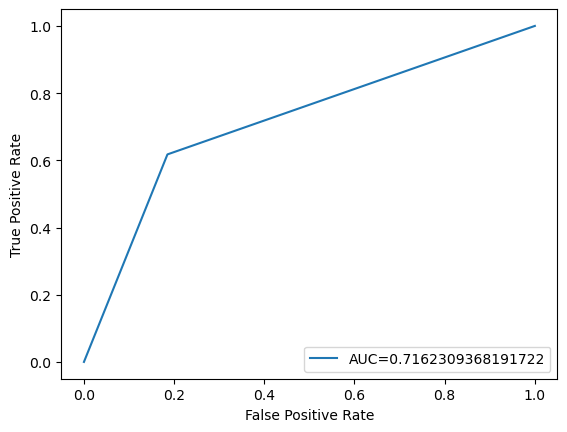

In [44]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)
y_preddt = DT.predict(X_test)
print("accuracy", metrics.accuracy_score(y_test,y_preddt))

from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_preddt)
TN1 = c_matrix[0][0]
FN1 = c_matrix[1][0]
TP1 = c_matrix[1][1]
FP1 = c_matrix[0][1]

TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)
print ("TP rate",TP_rate)
print ("FP rate",FP_rate)

print(c_matrix)
print("recall:",metrics.recall_score(y_test, y_preddt))
print("precision:",metrics.precision_score(y_test,y_preddt))
print("accuracy:",metrics.accuracy_score(y_test, y_preddt))
print("F1",metrics.f1_score(y_test,y_preddt))
print(metrics.classification_report(y_test,y_preddt))
print("AUC:",metrics.roc_auc_score(y_test, y_preddt))
print("MCC" ,matthews_corrcoef(y_test, y_preddt))
fpr, tpr, _ = metrics.roc_curve(y_test, y_preddt)
auc = metrics.roc_auc_score(y_test, y_preddt)
#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('AUC_DT.png')
plt.show()

Tunning the parameters of the algorithms and creating a best parameters and best classifier to see the best algorithm overall. 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Classifiers
DT = DecisionTreeClassifier()
xgb_classifier = XGBClassifier()
knn = KNeighborsClassifier()
MLP = MLPClassifier(max_iter=1000000)

# Multi-layer Perceptron (MLP) hyperparameters
mlp_param = {
    'classifier__hidden_layer_sizes': [(12,),(20,),(30,),(6,12,),(8,),(50,)],
    'classifier__activation': ['tanh', 'relu','logistic'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05 , 0.001],
}

# K-Nearest Neighbors (KNN) hyperparameters
knn_param = {
    'classifier__n_neighbors': [3, 5, 7, 10],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# XGBoost hyperparameters
xgb_param = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__gamma': [0, 0.1, 0.5, 1],
}

# Decision Tree hyperparameters
dt_param = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 5, 10],
}

mlp_pipeline = Pipeline([('classifier', MLP)])
knn_pipeline = Pipeline([('classifier', knn)])
xgb_pipeline = Pipeline([('classifier', xgb_classifier)])
dt_pipeline = Pipeline([('classifier', DT)])

params = [mlp_param, knn_param, xgb_param, dt_param]

best_scores = []
best_params = []
for idx, pipeline in enumerate([mlp_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline]):
    gs = GridSearchCV(pipeline, params[idx], cv=5, n_jobs=-1, scoring='roc_auc')
    gs.fit(X_train, y_train)
    best_scores.append(gs.best_score_)
    best_params.append(gs.best_params_)
    
# Get the index of the pipeline with the best score
best_idx = best_scores.index(max(best_scores))
best_pipeline = [mlp_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline][best_idx]
best_param = best_params[best_idx]

# Train the best pipeline on the entire dataset
best_pipeline.set_params(**best_param)
best_pipeline.fit(X, y)

# Evaluate the best pipeline on the test set
y_pred = best_pipeline.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test ROC AUC score:", roc_auc_score(y_test, y_pred))
print("Test F1 score:",metrics.f1_score(y_test,y_pred))
print("Test AUC Score:",metrics.roc_auc_score(y_test, y_pred))
print("Test MCC Score" ,matthews_corrcoef(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred))
print("Best Pipeline:", best_pipeline)

Test Accuracy: 0.8688524590163934
Test Precision: 0.8611111111111112
Test Recall: 0.9117647058823529
Test ROC AUC score: 0.8632897603485838
Test F1 score: 0.8857142857142858
Test AUC Score: 0.8632897603485838
Test MCC Score 0.7338093457393797
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

Best Pipeline: Pipeline(steps=[('classifier',
                 MLPClassifier(alpha=0.05, hidden_layer_sizes=(8,),
                               max_iter=1000000))])
